# Genome Information Density

This notebook analyzes 6 genomes and their repeatability in regards to 8-grams. It compares the number of distinct n-grams to the length of the genome sequence scanned.



**Plots** for visualizing n-gram repeatability:


   - **Main Superimposed Plots**
       - This first algorithm returns the increasing repetition found in the 8-grams of each genome sequence. With NumPy and Matplotlib, it creates the superimposed genome plot.
           - i + 1 = # of n-grams
           - 1-len(ngramcounts)/(i+1)
               - Example: if, after 100 base pairs, there are no repeats and n-grams are all different, the following is computed: 100/100 = 1, then 1 - 1 = 0.
           - Logarithmic axes are used for plotting such computations.
               - Log(0) is -∞, which is not shown in the first plot using the algorithm.
               - Log(a positive number) is a real number, which is shown on the plot.
               - Thus, as more repetitions occur in the genomes, the graphs increase from -∞
               

   - **Other Plots (Initial Tries)** - shows # of distinct 8-grams vs sequence length
       - More About Genome 1 (Aaosphaeria arxii)
           - 1st graph: 100,000 base pairs, 8-gram. Logarithmic axes are used for plotting
           - 2nd graph: 100,000 base pairs, 8-gram. No logarithmic axes are used for plotting
           - 3rd graph: Entire Filtered Genome 1.
       - More About Genome 2 (Abiotrophia defectiva)
           - Graph: Filtered of Genome 2 (1,000,000 base pairs, 8-grams)
       - More About Genome 3 (Abditibacterium utsteinense)
           - Graph: Filtered Genome 3 (1,000,000 base pairs, 8-grams)

# Plotting

## Main Superimposed Plots

In [117]:
def seq_ngrams2(xs, n):
    return (xs[i:i+n] for i in range(len(xs)-n+1))

In [118]:
import numpy as np

In [119]:
import matplotlib.pyplot as plt

In [120]:
files = {'Aaosphaeria arxii (Eukaryota)': 'genomes/genome1_filtered.fna',
         'Abiotrophia defectiva (Bacteria)': 'genomes/genome2_filtered.fna',
         'Abditibacterium utsteinense (Bacteria)':'genomes/genome3_filtered.fna',
         'Sars-CoV-2':'genomes/Sars-CoV-2_Genome.fna',
         'Homo sapiens chromosome 21 open reading frame 91':'genomes/Homo Sapiens Chromosome 21.fna',
         'Tai Forest Ebolavirus (ivory cost)': 'genomes/Tai_Forest_Ebolavirus_(ivory cost).fna'}

In [121]:
for (genome_name, file_path) in files.items(): 
    print((genome_name, file_path))

('Aaosphaeria arxii (Eukaryota)', 'genomes/genome1_filtered.fna')
('Abiotrophia defectiva (Bacteria)', 'genomes/genome2_filtered.fna')
('Abditibacterium utsteinense (Bacteria)', 'genomes/genome3_filtered.fna')
('Sars-CoV-2', 'genomes/Sars-CoV-2_Genome.fna')
('Homo sapiens chromosome 21 open reading frame 91', 'genomes/Homo Sapiens Chromosome 21.fna')
('Tai Forest Ebolavirus (ivory cost)', 'genomes/Tai_Forest_Ebolavirus_(ivory cost).fna')


In [122]:
ndistinct_by_genome = {}

for (genome_name, file_path) in files.items():
    with open(file_path) as myfile:
        data = myfile.read().replace('\n','')
        genome = data[:90000]
    ngramcounts = dict()
    ndistinct = []
    for (i,x) in enumerate(seq_ngrams2(genome,10)):
        if x in ngramcounts.keys():
            ngramcounts[x] += 1
        else:
            ngramcounts[x] = 1
        ndistinct.append(1-len(ngramcounts)/(i+1))
    ndistinct_by_genome[genome_name] = ndistinct
ndistinct[-1]

0.021450135056405917

In [125]:
ndistinct_by_genome["Abiotrophia defectiva (Bacteria)"][-1]

0.08221933304441553

[0.05125469538352112, 0.051254125779313875, 0.051253556187766725, 0.051252986608879225, 0.051252417042651044, 0.05125184748908174, 0.05125127794817086, 0.05125070841991797, 0.05125013890432273, 0.05124956940138459]
[0.08222755662243564, 0.08222664281030856, 0.08222572901849212, 0.08222481524698566, 0.08222390149578829, 0.08222298776489934, 0.08222207405431836, 0.08222116036404448, 0.08222024669407713, 0.08221933304441553]
[0.13906114556244586, 0.1390707133569674, 0.13908028093883362, 0.13908984830805138, 0.13908830262485272, 0.13909786969228888, 0.13910743654709512, 0.13910589071997692, 0.13910434492721413, 0.13910279916880575]
[0.028424612982958286, 0.02842368857523825, 0.028422764227642228, 0.02842183994016456, 0.02845343392299693, 0.028485025851136436, 0.02851661572478381, 0.028548203544139117, 0.02857978930940308, 0.02857886009688848]
[0.05812613205993744, 0.058124217875255235, 0.05815523430039182, 0.05815331928345624, 0.05815140439263722, 0.05818241685874215, 0.058213427282605146,

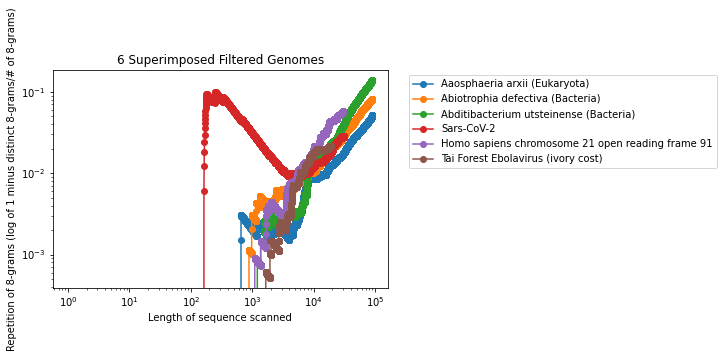

In [154]:
for genome_name in files.keys():
    y = ndistinct_by_genome[genome_name]
    x = np.arange(len(y))
    plt.plot(x, y,"o-",label = genome_name)
    print(y[-10:])

ax = plt.gca()
ax.set_xscale("log")
ax.set_yscale("log")

# naming the x axis
plt.xlabel('Length of sequence scanned')
# naming the y axis
plt.ylabel('Repetition of 8-grams (log of 1 minus distinct 8-grams/# of 8-grams)')

# giving a title to my graph
plt.title('6 Superimposed Filtered Genomes')

# function to show the plot
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
#plt.show()

## Other Plots (Intial Work)

### More About Genome 1 (Aaosphaeria arxii)

In [144]:
def seq_ngrams2(xs, n):
    return (xs[i:i+n] for i in range(len(xs)-n+1))

import numpy as np
import matplotlib.pyplot as plt

In [145]:
with open('genomes/genome1_filtered.fna','r') as file:
    data = file.read().replace('\n','')
    genome = data[:40000]
    
ngramcounts = dict()
ndistinct = []
for x in seq_ngrams2(genome, 6):
    #print(x)
    if x in ngramcounts.keys():
        ngramcounts[x] += 1
    else:
        ngramcounts[x] = 1
    ndistinct.append(len(ngramcounts))
ndistinct[-1]

4093

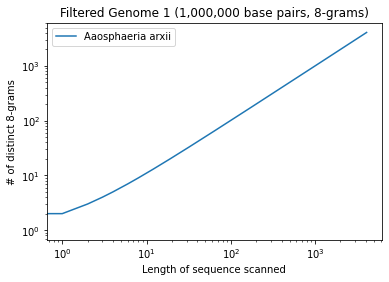

In [308]:
y=(ndistinct)
x=np.arange(len(y))

plt.plot(x,y,label="Aaosphaeria arxii")

ax=plt.gca()
ax.set_xscale("log")
ax.set_yscale("log")

plt.xlabel('Length of sequence scanned')
plt.ylabel('# of distinct 8-grams')

plt.title('Filtered Genome 1 (1,000,000 base pairs, 8-grams)')

plt.legend()

In [113]:
with open('genomes/genome1_filtered.fna','r') as file:
    data = file.read().replace('\n','')
    genome = data[:1000000]
    
ngramcounts = dict()
ndistinct = []
for x in seq_ngrams2(genome, 8):
    #print(x)
    if x in ngramcounts.keys():
        ngramcounts[x] += 1
    else:
        ngramcounts[x] = 1
    ndistinct.append(len(ngramcounts))
len(ndistinct)

999993

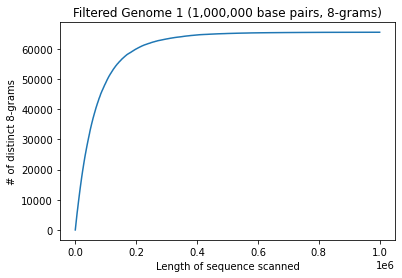

In [114]:
x=np.arange(0,999993,1)
y=(ndistinct)

plt.plot(x,y)

plt.xlabel('Length of sequence scanned')
plt.ylabel('# of distinct 8-grams')

plt.title('Filtered Genome 1 (1,000,000 base pairs, 8-grams)')

plt.show()

In [3]:
def seq_ngrams2(xs, n):
    return (xs[i:i+n] for i in range(len(xs)-n+1))

In [4]:
files = ['genomes/genome1_filtered.fna']

In [14]:
for file in files:
    with open(file) as myfile:
        data = myfile.read().replace('\n','')
    ngramcounts = dict()
    ndistinct1 = []
    for x in seq_ngrams2(data, 3):
    #print(x)
        if x in ngramcounts.keys():
            ngramcounts[x] += 1
        else:
            ngramcounts[x] = 1
        ndistinct1.append(len(ngramcounts))
len(ndistinct1)

38901047

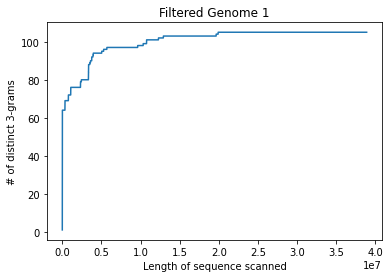

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# x axis values
x=np.arange(1,38901048,1)
y=(ndistinct1)

# plotting the points
plt.plot(x,y)

# naming the x axis
plt.xlabel('Length of sequence scanned')
# naming the y axis
plt.ylabel('# of distinct 3-grams')

# giving a title to my graph
plt.title('Filtered Genome 1')

# function to show the plot
plt.show()

### More About Genome 2 (Abiotrophia defectiva)

In [147]:
def seq_ngrams2(xs, n):
    return (xs[i:i+n] for i in range(len(xs)-n+1))

In [148]:
import matplotlib.pyplot as plt
import numpy as np

In [126]:
with open('genomes/genome2_filtered.fna','r') as file:
    data = file.read().replace('\n','')
    genome = data[:1000000]

In [127]:
ngramcounts = dict()
ndistinct = []
for x in seq_ngrams2(genome, 8):
    #print(x)
    if x in ngramcounts.keys():
        ngramcounts[x] += 1
    else:
        ngramcounts[x] = 1
    ndistinct.append(len(ngramcounts))
len(ndistinct)

999993

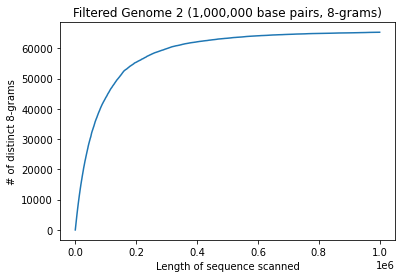

In [128]:
x=np.arange(0,999993,1)
y=(ndistinct)

plt.plot(x,y)

plt.xlabel('Length of sequence scanned')
plt.ylabel('# of distinct 8-grams')

plt.title('Filtered Genome 2 (1,000,000 base pairs, 8-grams)')

plt.show()

### More About Genome 3 (Abditibacterium utsteinense)

In [149]:
def seq_ngrams2(xs, n):
    return (xs[i:i+n] for i in range(len(xs)-n+1))

In [150]:
import matplotlib.pyplot as plt
import numpy as np

In [134]:
with open('genomes/genome3_filtered.fna','r') as file:
    data = file.read().replace('\n','')
    genome = data[:1000000]
    
ngramcounts = dict()
ndistinct = []
for x in seq_ngrams2(genome, 8):
    #print(x)
    if x in ngramcounts.keys():
        ngramcounts[x] += 1
    else:
        ngramcounts[x] = 1
    ndistinct.append(len(ngramcounts))
len(ndistinct)

999993

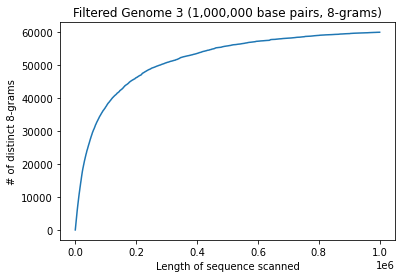

In [132]:
x=np.arange(0,999993,1)
y=(ndistinct)

plt.plot(x,y)

plt.xlabel('Length of sequence scanned')
plt.ylabel('# of distinct 8-grams')

plt.title('Filtered Genome 3 (1,000,000 base pairs, 8-grams)')

plt.show()